In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp
from nearNeighborsHEALPix import *
from localBKG_and_interlopersHEALPix import *
import healpy as hpy
import mpl_scatter_density

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, rmag_BKG1, gmag_BKG1, zmag_BKG1, color_BKG1, rmag_LRG1, gmag_LRG1, zmag_LRG1, color_LRG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)

id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, rmag_BKG2, gmag_BKG2, zmag_BKG2, color_BKG2, rmag_LRG2, gmag_LRG2, zmag_LRG2, color_LRG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)


# ra = np.concatenate([ra_LRG1, ra_LRG2, ra_BKG1, ra_BKG2])
# dec = np.concatenate([dec_LRG1, dec_LRG2, dec_BKG1, dec_BKG2])
# z_LRG = np.concatenate([z_LRG1, z_LRG2])
# gmag = np.concatenate([gmag_LRG1, gmag_LRG2, gmag_BKG1, gmag_BKG2])
# rmag = np.concatenate([rmag_LRG1, rmag_LRG2, rmag_BKG1, rmag_BKG2])
# zmag = np.concatenate([zmag_LRG1, zmag_LRG2, zmag_BKG1, zmag_BKG2])
# color = np.concatenate([color_LRG1, color_LRG2, color_BKG1, color_BKG2])

# id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, rmag_BKG1, gmag_BKG1, zmag_BKG1, grcolor_BKG1, rzcolor_BKG1, gzcolor_BKG1, rmag_LRG1, gmag_LRG1, zmag_LRG1, grcolor_LRG1, rzcolor_LRG1, gzcolor_LRG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)
# id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, rmag_BKG2, gmag_BKG2, zmag_BKG2, grcolor_BKG2, rzcolor_BKG2, gzcolor_BKG2, rmag_LRG2, gmag_LRG2, zmag_LRG2, grcolor_LRG2, rzcolor_LRG2, gzcolor_LRG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)

# ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
# ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
# dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])
# dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
# z_LRG = np.concatenate([z_LRG1, z_LRG2])
# gmag_LRG = np.concatenate([gmag_LRG1, gmag_LRG2])
# gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
# rmag_LRG = np.concatenate([rmag_LRG1, rmag_LRG2])
# rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
# zmag_LRG = np.concatenate([zmag_LRG1, zmag_LRG2])
# zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
# color_LRG = np.concatenate([color_LRG1, color_LRG2])
# color_BKG = np.concatenate([color_BKG1, color_BKG2])
# rzcolor_LRG = np.concatenate([rzcolor_LRG1, rzcolor_LRG2])
# rzcolor_BKG = np.concatenate([rzcolor_BKG1, rzcolor_BKG2])
# gzcolor_LRG = np.concatenate([gzcolor_LRG1, gzcolor_LRG2])
# gzcolor_BKG = np.concatenate([gzcolor_BKG1, gzcolor_BKG2])

print("end readdata")

length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  5182673
length of id_ALL:  5182673
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 5182673
length of idcut = 1 (is an LRG in DECaLS-only file): 1233
length of idcut = 0 (is not an LRG in DECaLS-only file): 5181440
length of z_lrg: 1233
length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  4008392
length of id_ALL:  4008392
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 4008392
length of idcut = 1 (is an LRG in DECaLS-only file): 391
length of idcut = 0 (is not an LRG in DECaLS-only file): 4008001
length of z_lrg: 391
end readdata


In [3]:
ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])
dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG = np.concatenate([z_LRG1, z_LRG2])
gmag_LRG = np.concatenate([gmag_LRG1, gmag_LRG2])
gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_LRG = np.concatenate([rmag_LRG1, rmag_LRG2])
rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_LRG = np.concatenate([zmag_LRG1, zmag_LRG2])
zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
color_LRG = np.concatenate([color_LRG1, color_LRG2])
color_BKG = np.concatenate([color_BKG1, color_BKG2])

ra_LRG = ra_LRG[np.where(zmag_LRG <= 21.5)]
dec_LRG = dec_LRG[np.where(zmag_LRG <= 21.5)]

ra_BKG = ra_BKG[np.where(zmag_BKG <= 21.5)]
dec_BKG = dec_BKG[np.where(zmag_BKG <= 21.5)]

z_LRG = z_LRG[np.where(zmag_LRG <= 21.5)]

gmag_LRG = gmag_LRG[np.where(zmag_LRG <= 21.5)]
rmag_LRG = rmag_LRG[np.where(zmag_LRG <= 21.5)]
zmag_LRG = zmag_LRG[np.where(zmag_LRG <= 21.5)]
color_LRG = color_LRG[np.where(zmag_LRG <= 21.5)]
# rzcolor_LRG = rzcolor_LRG[np.where(zmag_LRG <= 21.5)]
# gzcolor_LRG = gzcolor_LRG[np.where(zmag_LRG <= 21.5)]


gmag_BKG = gmag_BKG[np.where(zmag_BKG <= 21.5)]
rmag_BKG = rmag_BKG[np.where(zmag_BKG <= 21.5)]
zmag_BKG = zmag_BKG[np.where(zmag_BKG <= 21.5)]
color_BKG = color_BKG[np.where(zmag_BKG <= 21.5)]
# rzcolor_BKG = rzcolor_BKG[np.where(zmag_BKG <= 21.5)]
# gzcolor_BKG = gzcolor_BKG[np.where(zmag_BKG <= 21.5)]

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

# readData returns (g-r) color
color = np.concatenate([color_LRG, color_BKG]) 
print(len(rmag))
print(len(color))

292428
292428


In [4]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [5]:
row = 10
column = 10
# zmag = np.concatenate([zmag_LRG, zmag_BKG])
# color = np.concatenate([color_LRG, color_BKG])
# creates histogram for survey sources; excludes LRGs
H, xedges, yedges = np.histogram2d(rmag, color, normed=False)
# print("xedges: ", xedges)
# print("yedges: ", yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(25.) # * (3600.**2.)) # converts square degrees to square arcseconds

In [6]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hpy.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hpy.ang2pix(nside, theta, phi, nest=True)

length phi:  292428


In [7]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, num = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag, color, xedges, yedges)

print('end nearNeighbor')

end nearNeighbor


In [8]:
# print(near[0])
# print(index[0])
# print(num[0])
# print(num[1])


mean number of near neighbors is 27.815886699507388
median number of near neighbors is 23.0
standard deviation of near neighbor is 20.305061826798724
standard error is 0.5040168506105677


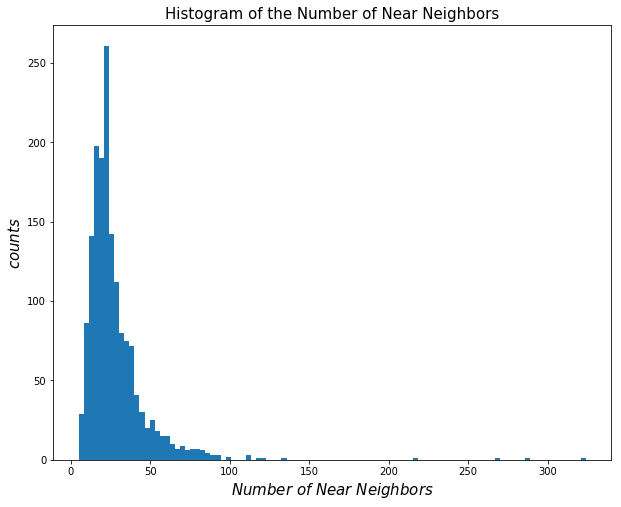

In [9]:
totalNear(near)

# plt.savefig('/Users/mtownsend/Desktop/Nnear.pdf')

plt.show()

In [17]:
# distance_r2 = 0.4 # in degree
# distance_r3 = 0.5 # in degree

# numbkg, med_local, sigma, omega, Nbkg = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)

inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, rmag, color, xedges, yedges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


mean number of interlopers is 20.90997274430441
median number of interlopers is 17.583373004354236
standard deviation of interloper is 15.36289112860567
standard error is 0.3813411684712727


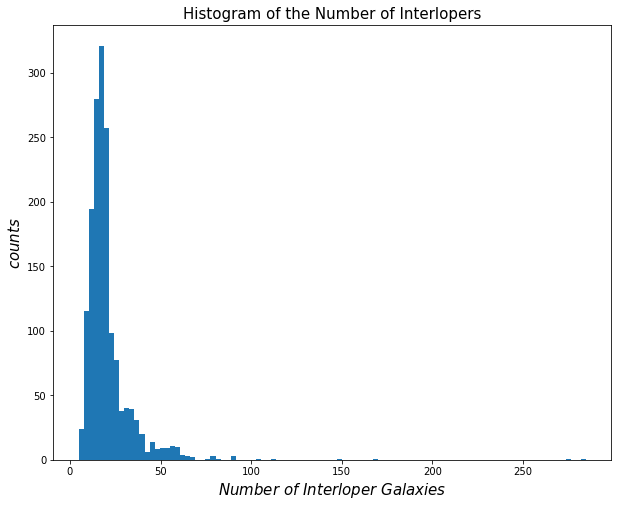

In [18]:
totalNbkg(Nbkg)

plt.show()

# result from HEALPix version
# mean number of interlopers is 73.04254421593905
# median number of interlopers is 58.21147204870343
# standard deviation of interloper is 57.37234474399042
# standard error is 1.4241093554241484

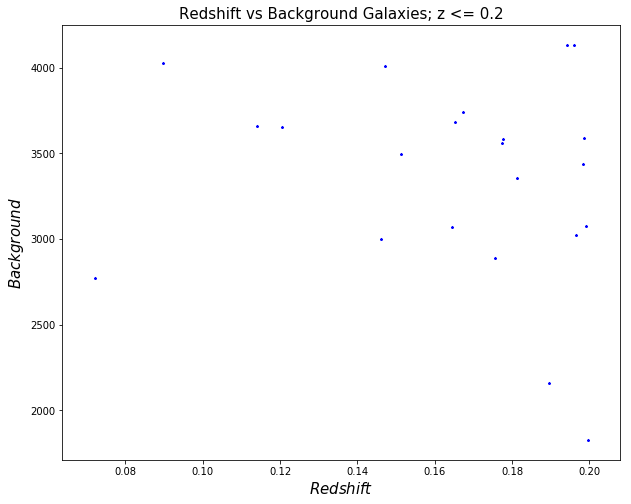

mean number of interlopers is 3288.860221674877


In [19]:
sumbkg = []
nbkg = []

# Sum up number of background galaxies for every LRG
for i in range(len(localBKG)):
    sumbkg.append(np.sum(localBKG[i]))
    
for i in range(len(Nbkg)):
    nbkg.append(np.sum(Nbkg[i]))
    
sumbkg = np.array(sumbkg)
nbkg = np.array(nbkg)


plt.scatter(z_LRG[np.where(z_LRG <= 0.2)], sumbkg[np.where(z_LRG <= 0.2)], s = 5, marker = '*', color='blue', label="z <= 0.2")
plt.title("Redshift vs Background Galaxies; z <= 0.2", fontsize=15)
plt.xlabel(r'$Redshift$', fontsize=15)
plt.ylabel(r'$Background$', fontsize=15)
plt.show()

meanbkg = np.mean(sumbkg)
print("mean number of interlopers is", meanbkg)

# print(ra_LRG[np.where((nbkg > 125) & (z_LRG <= 0.2))])
# print(dec_LRG[np.where((nbkg > 125) & (z_LRG <= 0.2))])


In [20]:
Nsat = np.array(near) - np.array(Nbkg)

# print(Nsat)

print("end Nsat")

end Nsat


mean number of satellites is 6.90591395520298
median number of satellites is 4.97348984977158
standard deviation of satellites is 11.268806195547873
standard error is 0.27971686357166553


4.97348984977158

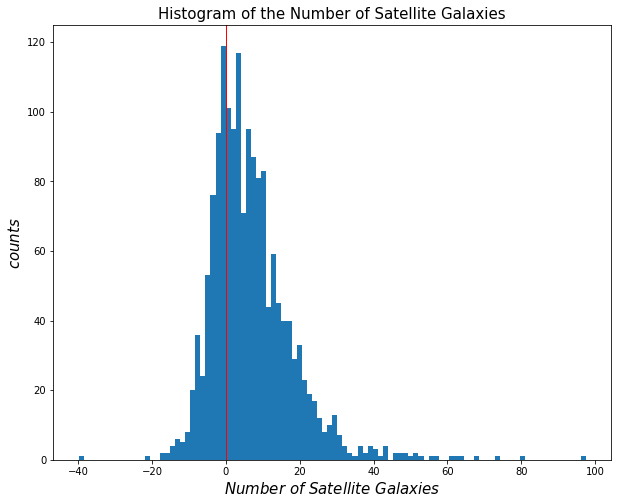

In [21]:
totalNsat(Nsat)

# plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/totalNsat.pdf")
# plt.savefig("/Users/mindy/Research/Plots/LRG_Project_Plots/totalNsat.pdf")
# plt.savefif

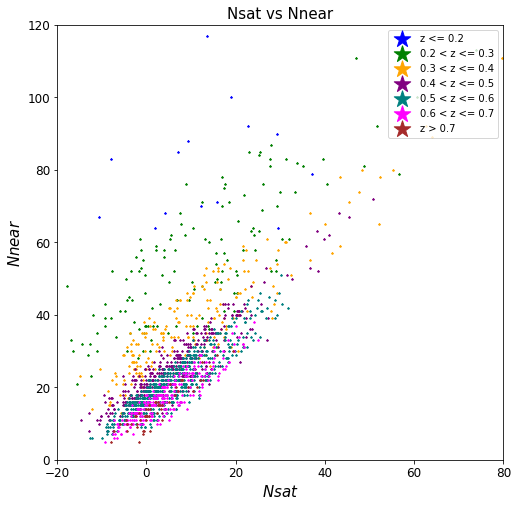

In [70]:
sumsat = []

# Sum up number of background galaxies for every LRG
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))
    
sumsat = np.array(sumsat)

sumnear = []

# Sum up number of background galaxies for every LRG
for i in range(len(near)):
    sumnear.append(np.sum(near[i]))

sumnear = np.array(sumnear)
    
plot = fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xticks(xedges, minor=False)
# ax.set_yticks(yedges, minor=True)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')

# plt.scatter(sumsat, sumnear, s = 5, marker = '+', color='blue')
plt.scatter(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s = 3, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s = 3, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Nsat vs Nnear; 0.2 < z <= 0.3", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s = 3, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Nsat vs Nnear; 0.3 < z <= 0.4", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s = 3, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Nsat vs Nnear; 0.4 < z <= 0.5", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s = 3, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Nsat vs Nnear; 0.5 < z <= 0.6", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s = 3, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Nsat vs Nnear; 0.6 < z <= 0.7", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s = 3, marker = '*', color='brown', label="z > 0.7")
# plt.title("Nsat vs Nnear; z > 0.7", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.gca().invert_xaxis()
plt.xlim(-20, 80)
plt.ylim(0, 120)
plt.title("Nsat vs Nnear", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)
ax.tick_params(labelsize=12)
plt.legend(loc='upper right', prop={'size': 10}, markerscale=10)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-colorcoded.pdf')

plt.show()

# plt.scatter(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s = 3, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()


mean background:  88.23409164825503
9700.397879556176


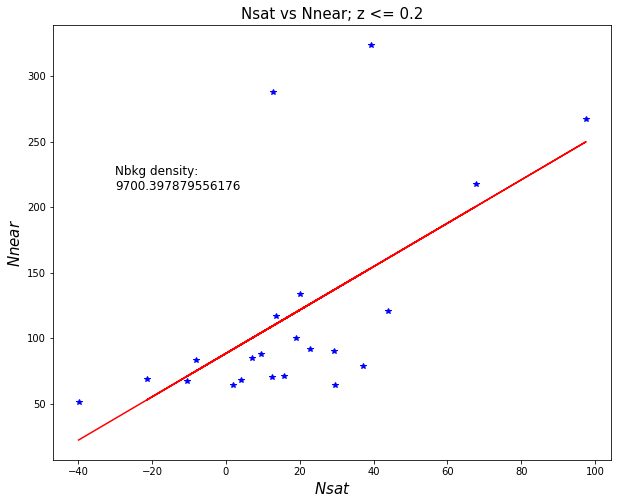

In [71]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

# popt, pcov = curve_fit(line, sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)])
popt, pcov = curve_fit(line, sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)])
print("mean background: ", popt[1])

omega1 = np.mean(omega[np.where(z_LRG <= 0.2)])

print(popt[1] / omega1)

# plt.plot(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], sumnear[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], '*')
# plt.plot(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], line(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], popt[0], popt[1]), '-r')
plt.plot(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], '*', color='blue')
plt.plot(sumsat[np.where(z_LRG <= 0.2)], line(sumsat[np.where(z_LRG <= 0.2)], popt[0], popt[1]), '-r')
plt.text(-30, 225, 'Nbkg density: ', fontsize=12)
plt.text(-30, 213, popt[1]/omega1, fontsize=12)
plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z02.pdf')

plt.show()


mean background:  44.642333008693726
11170.437842762782


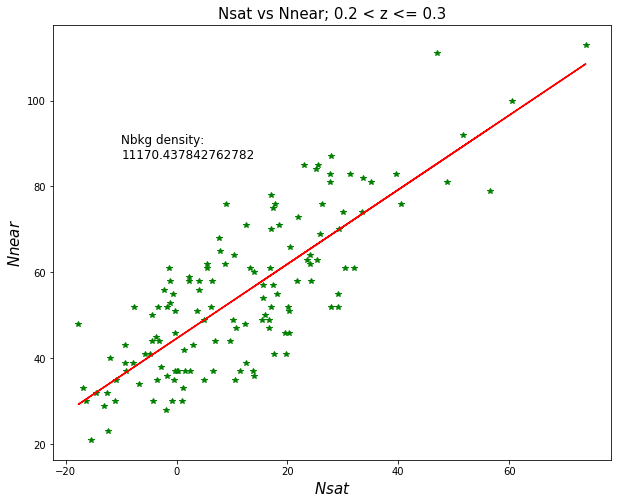

In [72]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))])
print("mean background: ", popt[1])

omega2 = np.mean(omega[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))])

print(popt[1] / omega2)

plt.plot(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], '*', color='green')
plt.plot(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], line(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], popt[0], popt[1]), '-r')
plt.text(-10, 90, 'Nbkg density: ', fontsize=12)
plt.text(-10, 86.5, popt[1]/omega2, fontsize=12)
plt.title("Nsat vs Nnear; 0.2 < z <= 0.3", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0203.pdf')

plt.show()


mean background:  28.33823423937313
11467.357677980772


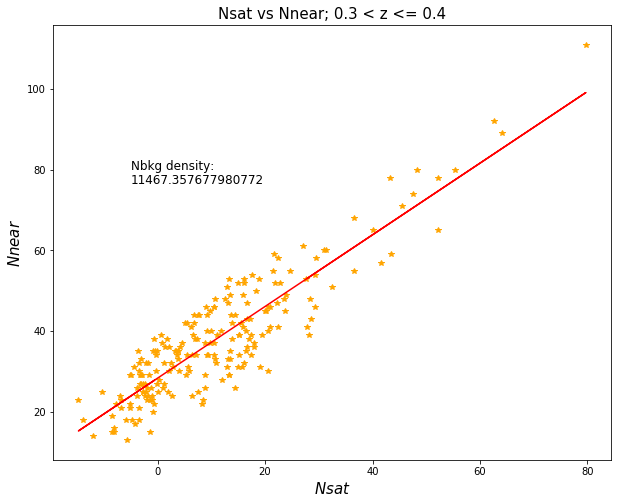

In [73]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))])
print("mean background: ", popt[1])

omega3 = np.mean(omega[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))])

print(popt[1] / omega3)

plt.plot(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], '*', color='orange')
plt.plot(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], line(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], popt[0], popt[1]), '-r')
plt.text(-5, 80, 'Nbkg density: ', fontsize=12)
plt.text(-5, 76.5, popt[1]/omega3, fontsize=12)
plt.title("Nsat vs Nnear; 0.3 < z <= 0.4", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0304.pdf')

plt.show()


mean background:  19.96674602248715
11281.949141019804


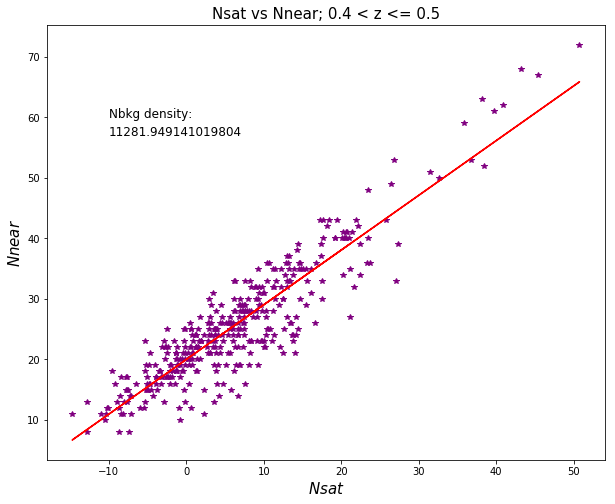

In [74]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))])
print("mean background: ", popt[1])

omega4 = np.mean(omega[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))])

print(popt[1] / omega4)

plt.plot(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], '*', color='purple')
plt.plot(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], line(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], popt[0], popt[1]), '-r')
plt.text(-10, 60, 'Nbkg density: ', fontsize=12)
plt.text(-10, 57, popt[1]/omega4, fontsize=12)
plt.title("Nsat vs Nnear; 0.4 < z <= 0.5", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0405.pdf')

plt.show()


mean background:  16.190401161528538
11119.539092396892


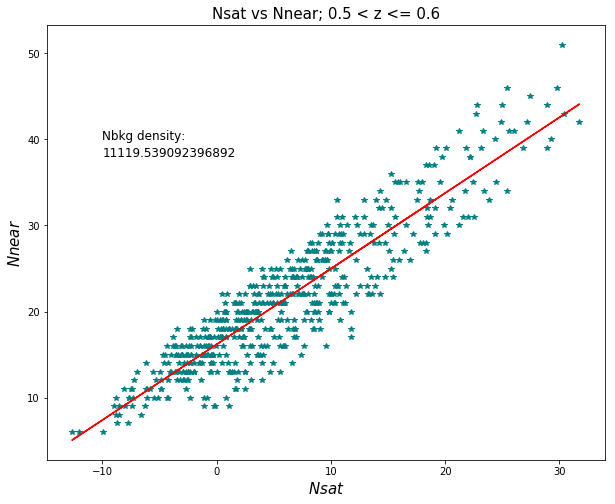

In [75]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))])
print("mean background: ", popt[1])

omega5 = np.mean(omega[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))])

print(popt[1] / omega5)

plt.plot(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], '*', color='teal')
plt.plot(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], line(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], popt[0], popt[1]), '-r')
plt.text(-10, 40, 'Nbkg density: ', fontsize=12)
plt.text(-10, 38, popt[1]/omega5, fontsize=12)
plt.title("Nsat vs Nnear; 0.5 < z <= 0.6", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0506.pdf')

plt.show()



mean background:  13.892410510749372
11135.940460433701


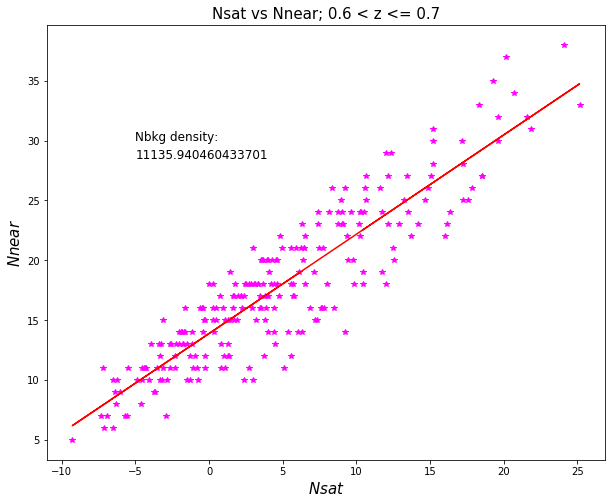

In [76]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))])
print("mean background: ", popt[1])

omega6 = np.mean(omega[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))])

print(popt[1] / omega6)

plt.plot(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], '*', color='magenta')
plt.plot(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], line(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], popt[0], popt[1]), '-r')
plt.text(-5, 30, 'Nbkg density: ', fontsize=12)
plt.text(-5, 28.5, popt[1]/omega6, fontsize=12)
plt.title("Nsat vs Nnear; 0.6 < z <= 0.7", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0607.pdf')

plt.show()


mean background:  12.272847839741988
10951.407237083073


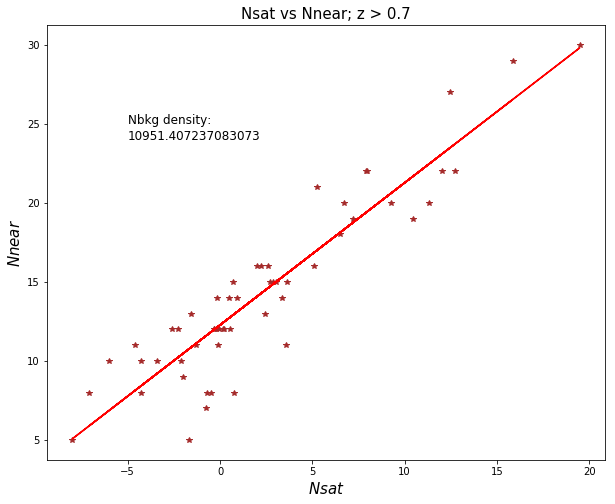

In [77]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)])
print("mean background: ", popt[1])

omega7 = np.mean(omega[np.where(z_LRG > 0.7)])

print(popt[1] / omega7)

plt.plot(sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], '*', color='brown')
plt.plot(sumsat[np.where(z_LRG > 0.7)], line(sumsat[np.where(z_LRG > 0.7)], popt[0], popt[1]), '-r')
plt.text(-5, 25, 'Nbkg density: ', fontsize=12)
plt.text(-5, 24, popt[1]/omega7, fontsize=12)
plt.title("Nsat vs Nnear; z > 0.7", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z07.pdf')

plt.show()


In [ ]:
# print(ra_LRG[np.where((sumnear > 200) & (z_LRG <= 0.2))])
# print(dec_LRG[np.where((sumnear > 200) & (z_LRG <= 0.2))])

print(ra_LRG[np.where(z_LRG <= 0.2)])
print(dec_LRG[np.where(z_LRG <= 0.2)])


In [ ]:
zHist(z_LRG)

plt.show()

In [ ]:
# cmd(zmag_BKG, rzcolor_BKG, zmag_LRG, rzcolor_LRG, xedges, yedges)

# import seaborn as sns
# import pandas as pd
from matplotlib.pyplot import *

# row = 10
# column = 10
# nx , ny = np.meshgrid(zmag_BKG, rzcolor_BKG)
# # creates histogram for survey sources; excludes LRGs
# H, xnouse, ynouse, image = hist2d(zmag_BKG, rzcolor_BKG, bins=500)
# plt.contour(H.transpose(), extent=[xedges.min(),xedges.max(),yedges.min(), yedges.max()], linewidths=3)
# plt.contour([nx,ny],H.transpose())
# plt.gca().invert_xaxis()
# plt.ylim([5.5,-5.5])
# # plt.colorbar(image)
# plt.imshow(im, cmap='gray')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='scatter_density')
# density = ax.scatter_density(zmag_BKG, rzcolor_BKG, vmin=0, vmax=50, cmap=plt.cm.Purples)
# plt.show()

# plt.rcParams['axes.facecolor'] = '0'
# H, xnouse, ynouse, image = hist2d(zmag_BKG, rzcolor_BKG, bins=500)
# plt.contour(H.transpose(), extent=[xedges.min(),xedges.max(),yedges.min(), yedges.max()], linewidths=1, cmap='cool')
# plt.show()

density = ax.scatter_density(zmag_BKG, rzcolor_BKG, vmin=0, vmax=20, cmap=plt.cm.Blues)
# # plt.scatter(zmag_BKG, gzcolor_BKG, s=1, marker = '*', color='red')
plt.scatter(zmag_LRG, gzcolor_LRG, s=1, marker = '*', color='red')
plt.gca().invert_xaxis()
plt.xlim(21.5, 15)
plt.ylim([-5,7.5])
plt.xlabel(r'$z-mag$',fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
# plt.legend(loc='upper right', prop={'size': 13}, markerscale=13)
fig.colorbar(density, label='Number Density') #, extend='max')
ax.tick_params(labelsize=12)
plt.savefig('/Users/mtownsend/Desktop/CMD-density.png')
plt.show()


# N = 10000000
# x = np.random.normal(4,2,N)
# y = np.random.normal(3,1,N)

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1,projection='scatter_density')
# ax.scatter_density(x,y)
# ax.set_xlim(-5,10)
# ax.set_ylim(-5,10)
# plt.show()


# plt.hexbin(zmag_BKG, rzcolor_BKG, gridsize=100, cmap=plt.cm.Purples)
# plt.scatter(zmag_LRG, gzcolor_LRG, s=1, marker = '*', color='red')
# plt.gca().invert_xaxis()
# plt.colorbar()
# plt.show()



In [ ]:
# cmd(zmag_BKG, gzcolor_BKG, zmag_LRG, gzcolor_LRG, xedges, yedges)

plot = fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')

plt.scatter(zmag_BKG, rzcolor_BKG, s = 1, marker = '+', color='blue', label="Background")
plt.scatter(zmag_LRG, rzcolor_LRG, s = 1, marker = '*', color='red', label='LRGs')
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram", fontsize=15)
plt.xlabel(r'$z-mag$', fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
ax.tick_params(labelsize=12)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)

plt.savefig('/Users/mtownsend/Desktop/rz_CMD.png')

plt.show()

In [ ]:
distance_r2 = 0.4
distance_r3 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

sum_sat = []
median_sat = []
Nsat = []
for i in range(len(distance_r3)):
    numbkg, med_local, sigma, omega, Nbkg, r2, dist_r2, r3, dist_r3 = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3[i], kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)
    Nsat = np.array(near) - np.array(Nbkg)
    mediansat = totalNsat(Nsat)
#     sum_sat.append(np.sum(N_sat))
    median_sat.append(mediansat)


In [ ]:
print(median_sat)

plt.plot(distance_r3, median_sat)
plt.show()

In [ ]:
# z < 0.2
Nsat1z = Nsat[np.where((z_LRG < 0.2) & (0.4 > z_LRG))]
# print(len(Nsat1z))

sumsat1z = []
for i in range(len(Nsat1z)):
    sumsat1z.append(np.sum(Nsat1z[i]))
    
# 0.2 <= z < 0.3
Nsat2z = Nsat[np.where((z_LRG >= 0.4) & (0.6 > z_LRG))]
# print(len(Nsat2z))

sumsat2z = []
for i in range(len(Nsat2z)):
    sumsat2z.append(np.sum(Nsat2z[i]))

# 0.3 <= z < 0.4
Nsat3z = Nsat[np.where(z_LRG >= 0.6)]
# print(len(Nsat3z))

sumsat3z = []
for i in range(len(Nsat3z)):
    sumsat3z.append(np.sum(Nsat3z[i]))
    

    
# Calculate mean for every redshift slice
mean_sumsat1z = np.median(sumsat1z)
print("mean number of satellites at 0.2 <= z < 0.4:", mean_sumsat1z)
mean_sumsat2z = np.median(sumsat2z)
print("mean number of satellites at 0.4 <= z < 0.6:", mean_sumsat2z)
mean_sumsat3z = np.median(sumsat3z)
print("mean number of satellites at 0.6 >= z :", mean_sumsat3z)

# plt.title("Histogram of the Number of Satellite Galaxies at Different LRG Redshift Slices")
plt.hist(sumsat1z, bins=25, alpha=0.5, label='0.2 <= z < 0.4')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z1hist.png')
plt.show()
plt.hist(sumsat2z, bins=25, alpha=0.5, label='0.4 <= z < 0.6')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z2hist.png')
plt.show()
plt.hist(sumsat3z, bins=25, alpha=0.5, label='0.6 >= z')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z3hist.png')
plt.show()


In [ ]:
sumsat = []
	
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))

plt.rcParams["figure.figsize"] = [8, 8]
plt.title("Histogram of the Number of Satellite Galaxies", fontsize=15)
plt.hist(sumsat, bins=100)
plt.axvline(linewidth=1, color='r')
ax.tick_params(labelsize=14)
plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/totalNsat.png')

plt.show()

